<a href="https://colab.research.google.com/github/Sweta-Das/DLCourse-LLMUsingSemanticSearch/blob/main/LLM_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install cohere

In [ ]:
!pip install cohere umap-learn altair datasets

In [ ]:
pip install python-dotenv

In [ ]:
import os
from dotenv import load_dotenv, find_dotenv

# reading local .env file
_ = load_dotenv(find_dotenv())

In [ ]:
# Creating cohere client using its api key
import cohere
co = cohere.Client('Cohere_API_key')

### Word Embeddings

In [ ]:
# Importing pandas to handle dataset
import pandas as pd

In [ ]:
# Considering a small dataset with 3 words
three_words = pd.DataFrame(
    {'text': ['joy',
              'happiness',
              'potato'
              ]})
three_words

,text
0,joy
1,happiness
2,potato


In [ ]:
# Creating embeddings for the 3 words
three_words_emb = co.embed(texts = list(three_words['text']),
                           model = 'embed-english-v2.0').embeddings

co.embed() is a Cohere function that performs embeddings, here, in texts we've passed the 3-words dataset & used the said model for embeddings.

In [ ]:
word_1 = three_words_emb[0]
word_2 = three_words_emb[1]
word_3 = three_words_emb[2]

In [ ]:
# Displaying word_1 embedding from 1-10
word_1[:10]

[2.3203125,
 -0.18334961,
 -0.578125,
 -0.7314453,
 -2.2050781,
 -2.59375,
 0.35205078,
 -1.6220703,
 0.27954102,
 0.3083496]

### Sentence Embeddings

In [ ]:
import pandas as pd

In [ ]:
sentence = pd.DataFrame(
    {
        'text': ['Where is the world cup?',
                'The world cup is in Qatar',
                'What color is the sky',
                 'The sky is blue',
                 'Where does the bear live?',
                 'The bear lives in the woods',
                 'What is an apple?',
                 'An apple is a fruit',]
    }
)
sentence

,text
0,Where is the world cup?
1,The world cup is in Qatar
2,What color is the sky
3,The sky is blue
4,Where does the bear live?
5,The bear lives in the woods
6,What is an apple?
7,An apple is a fruit


In [ ]:
# Creating embeddings for the sentences
sent_emb = co.embed(texts = list(sentence['text']),
                    model = 'embed-english-v2.0').embeddings

In [ ]:
# Exploring 10 1st entries of the embeddings of 3 sentences
for e in sent_emb:
  print(e[:3])

[0.27539062, -0.3791504, -1.0244141]
[0.4987793, 1.2255859, 0.4074707]
[0.21118164, -0.6118164, 1.4580078]
[0.08404541, -0.3203125, 0.92626953]
[0.49682617, -0.34985352, -1.6162109]
[1.2119141, -1.3544922, -1.796875]
[0.15527344, -0.92089844, 1.5996094]
[1.0751953, -0.72021484, 0.92871094]


In [ ]:
# Checking how many numbers are associated with each sentence
len(sent_emb[0])

4096

This shows that each sentence in the dataset has 4096 numbers associated with it i.e., embeddings.

In [ ]:
# Visualizing the embedding
import umap
import altair as alt

In [ ]:
def umap_plot(text, emb):

    cols = list(text.columns)
    # UMAP reduces the dimensions from 1024 to 2 dimensions that we can plot
    reducer = umap.UMAP(n_neighbors=2)
    umap_embeds = reducer.fit_transform(emb)
    # Prepare the data to plot and interactive visualization
    # using Altair
    #df_explore = pd.DataFrame(data={'text': qa['text']})
    #print(df_explore)

    #df_explore = pd.DataFrame(data={'text': qa_df[0]})
    df_explore = text.copy()
    df_explore['x'] = umap_embeds[:,0]
    df_explore['y'] = umap_embeds[:,1]

    # Plot
    chart = alt.Chart(df_explore).mark_circle(size=60).encode(
        x=#'x',
        alt.X('x',
            scale=alt.Scale(zero=False)
        ),
        y=
        alt.Y('y',
            scale=alt.Scale(zero=False)
        ),
        tooltip=cols
        #tooltip=['text']
    ).properties(
        width=700,
        height=400
    )
    return chart


In [ ]:
# from utils import umap_plot
chart = umap_plot(sentence, sent_emb)
chart.interactive()

alt.Chart(...)

Following results are obtd., where similar texts are placed together.

### Articles Embedding

In [ ]:
import pandas as pd
wiki_articles = pd.read_pickle('wikipedia.pkl')
wiki_articles

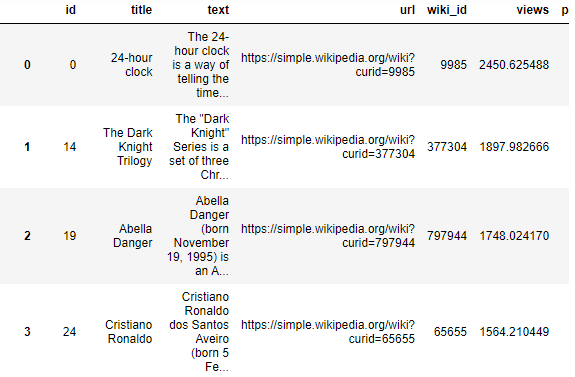

In [ ]:
import numpy as np
# from utils import umap_plot_big

def umap_plot_big(text, emb):

    cols = list(text.columns)
    # UMAP reduces the dimensions from 1024 to 2 dimensions that we can plot
    reducer = umap.UMAP(n_neighbors=100)
    umap_embeds = reducer.fit_transform(emb)
    # Prepare the data to plot and interactive visualization
    # using Altair
    #df_explore = pd.DataFrame(data={'text': qa['text']})
    #print(df_explore)

    #df_explore = pd.DataFrame(data={'text': qa_df[0]})
    df_explore = text.copy()
    df_explore['x'] = umap_embeds[:,0]
    df_explore['y'] = umap_embeds[:,1]

    # Plot
    chart = alt.Chart(df_explore).mark_circle(size=60).encode(
        x=#'x',
        alt.X('x',
            scale=alt.Scale(zero=False)
        ),
        y=
        alt.Y('y',
            scale=alt.Scale(zero=False)
        ),
        tooltip=cols
        #tooltip=['text']
    ).properties(
        width=700,
        height=400
    )
    return chart

In [ ]:
articles = wiki_articles[['title', 'text']]
embeds = np.array([d for d in wiki_articles['emb']])

chart = umap_plot_big(articles, embeds)
chart.interactive()

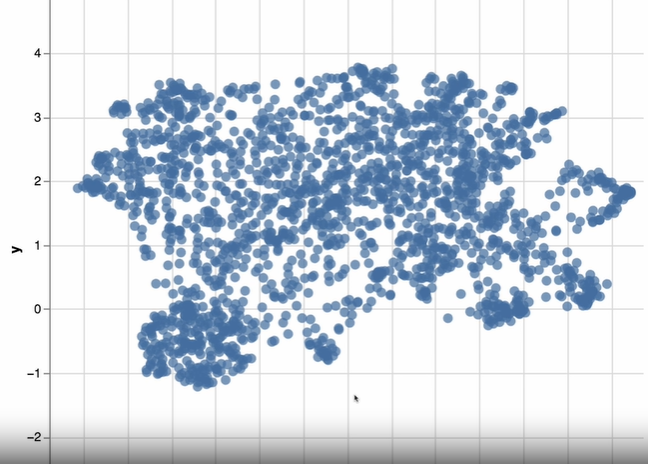